
## Multi-Input Time Series and ensembles


In [1]:

from sktime.forecasting.compose import EnsembleForecaster
from sklearn.svm import SVR
from sktime.transformations.series.detrend import ConditionalDeseasonalizer
from sktime.datasets import load_macroeconomic


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import warnings
## warnings.filterwarnings('ignore')
from statsmodels.tsa.api import seasonal_decompose, adfuller


In [3]:

import sktime
import statsmodels as sm
import matplotlib 
import sklearn

from sklearn.linear_model import( LinearRegression, 
                                 ElasticNet, 
                                 Ridge, 
                                 Lasso, 
                                 HuberRegressor)


from sktime.performance_metrics.forecasting import(MeanAbsolutePercentageError, 
                                                   MeanSquaredError, 
                                                   MeanAbsoluteScaledError)

from statsmodels.graphics.tsaplots import plot_acf


In [4]:

from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor, 
                              ExtraTreesRegressor)


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [5]:

from sktime.transformations.series.detrend import Deseasonalizer
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError as mape
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.performance_metrics.forecasting import mean_squared_percentage_error as mspe
from sktime.performance_metrics.forecasting import mean_squared_error as mse
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as  mase 


In [6]:

from sktime.forecasting.compose import make_reduction


In [7]:

from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import                  SlidingWindowSplitter
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError


In [8]:

load_macroeconomic().shape


(203, 12)

In [12]:

load_macroeconomic()


,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
Period,,,,,,,,,,,,
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71


In [13]:

econ = load_macroeconomic()

cols = ['realgdp','realdpi','tbilrate', 'unemp', 'infl']

econ_df = econ[cols]


In [14]:

econ_df.shape


(203, 5)

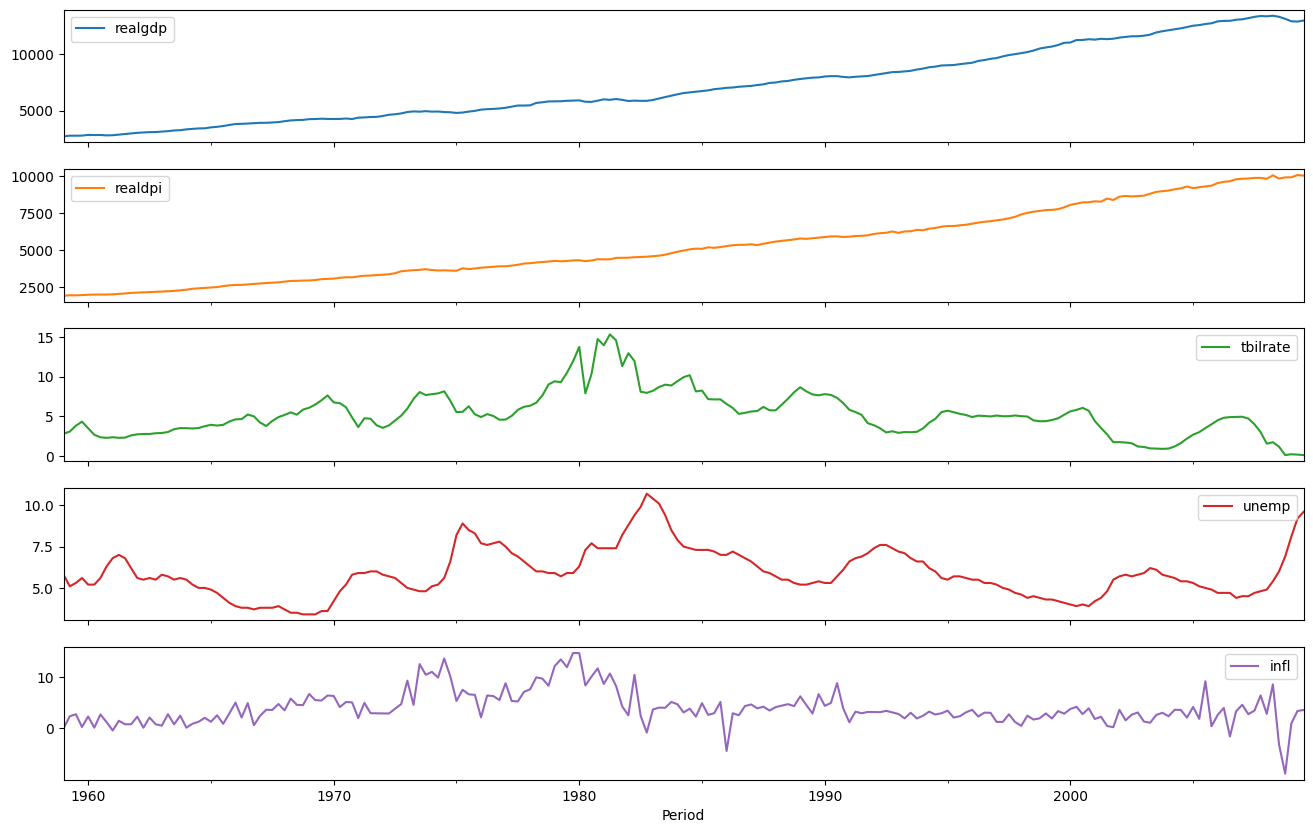

In [15]:

econ_df.plot(subplots=True, figsize=(16, 10));plt.show()


In [16]:

econ_df.head()


,realgdp,realdpi,tbilrate,unemp,infl
Period,,,,,
1959Q1,2710.349,1886.9,2.82,5.8,0.00
1959Q2,2778.801,1919.7,3.08,5.1,2.34
1959Q3,2775.488,1916.4,3.82,5.3,2.74
1959Q4,2785.204,1931.3,4.33,5.6,0.27
1960Q1,2847.699,1955.5,3.50,5.2,2.31


In [18]:

cond_deseason = ConditionalDeseasonalizer(sp=4)
detrend       = Detrender(forecaster=PolynomialTrendForecaster(degree=1))

for col in econ_df:
    econ_df[col] = cond_deseason.fit_transform( econ_df[col] )
    econ_df[col] = detrend.fit_transform(       econ_df[col] )


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_1596/2014303376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_df[col] = cond_deseason.fit_transform( econ_df[col] )
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_1596/2014303376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_df[col] = detrend.fit_transform(       econ_df[col] )
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_1596/2014303376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [19]:

y    = econ_df['unemp']
exog = econ_df.drop(columns=['unemp'])


In [23]:

y


1959Q1    0.019981
1959Q2   -0.682073
1959Q3   -0.477137
1959Q4   -0.178195
1960Q1   -0.584254
            ...   
2008Q3    0.015321
2008Q4    0.914262
2009Q1    2.108203
2009Q2    3.206149
2009Q3    3.611085
Freq: Q-DEC, Name: unemp, Length: 203, dtype: float64

In [22]:

exog


,realgdp,realdpi,tbilrate,infl
1959Q1,935.499291,688.616981,-3.326594,-4.649796
1959Q2,941.129724,675.700479,-3.024784,-2.535008
1959Q3,885.348453,635.349564,-2.347751,-2.162302
1959Q4,846.376673,606.895231,-1.800005,-4.257355
1960Q1,857.340214,594.458648,-2.613408,-2.308508
...,...,...,...,...
2008Q3,874.515644,582.091265,-3.371671,-6.529231
2008Q4,643.147864,620.836932,-4.383925,-11.784284
2009Q1,375.106405,590.200349,-4.267328,-2.145437
2009Q2,288.378838,695.583847,-4.265519,0.059350


In [24]:

len(econ_df)*0.1


20.3

In [26]:

def split_data(df, test_split=0.15):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test


In [27]:

test_size = 0.1

y_train, y_test       = split_data(y,    test_split=test_size)

exog_train, exog_test = split_data(exog, test_split=test_size)


In [28]:

regressors = [
    ("LinearRegression", make_reduction(LinearRegression())),
    ("RandomForest", make_reduction(RandomForestRegressor())),
    ("SupportVectorRegressor", make_reduction(SVR())),
    ("GradientBoosting", make_reduction(GradientBoostingRegressor()))
]


In [29]:

ensemble = EnsembleForecaster(regressors)
naive    = NaiveForecaster()


In [30]:

ensemble.fit(y=y_train, X=exog_train)
naive.fit(   y=y_train, X=exog_train)


NaiveForecaster()

In [31]:

fh = ForecastingHorizon(y_test.index, is_relative=None)

y_hat = pd.DataFrame(y_test).rename(columns={'unemp': 'test'})



In [33]:

y_hat['EnsembleForecaster'] = ensemble.predict(fh=fh, X=exog_test)
y_hat['NaiveForecaster']    = naive.predict(   fh=fh, X=exog_test)


/Users/user/opt/anaconda3/envs/py39_time_series/lib/python3.9/site-packages/sktime/forecasting/compose/_ensemble.py:367: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  y_pred = y_pred.groupby(level=1, axis=1).agg(


In [34]:

y_hat.rename(columns={'test':'y'}, inplace=True)


In [36]:

def evaluate(df, train, sort_by='MASE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['y']
    y_predicted = df.drop(columns=['y'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p], symmetric=True)
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p], symmetric=False)
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
        evals.loc['MASE', p] = mase(y_truth, y_predicted[p], y_train=train)
    return evals.T.sort_values(by=sort_by)


In [37]:

evaluate(y_hat, y_train)


,sMAPE,MAPE,RMSE,MASE
NaiveForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.537844,4.522654
EnsembleForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.358606,4.551323


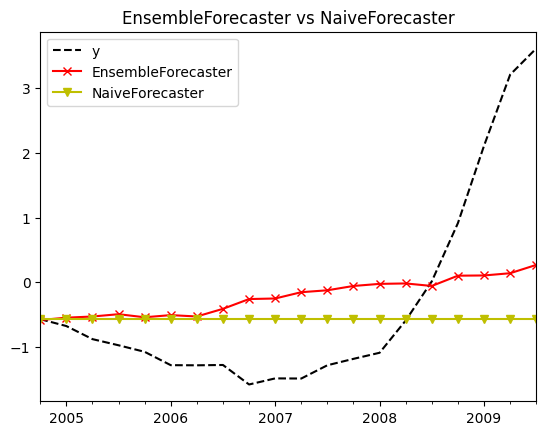

In [38]:

styles = ['k--','rx-','yv-']

for col, s in zip(y_hat, styles):
    y_hat[col].plot(style=s, label=col, 
                    title='EnsembleForecaster vs NaiveForecaster')
plt.legend()
#plt.savefig('../../../Packt-Time-Series-Cookbook/Chapters/Ch12/images/fig_12.18.png', bbox_inches='tight', dpi=600)



In [39]:

regressors


[('LinearRegression',
  RecursiveTabularRegressionForecaster(estimator=LinearRegression())),
 ('RandomForest',
  RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor())),
 ('SupportVectorRegressor',
  RecursiveTabularRegressionForecaster(estimator=SVR())),
 ('GradientBoosting',
  RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor()))]

In [40]:

from sktime.forecasting.compose import AutoEnsembleForecaster

auto = AutoEnsembleForecaster(forecasters=regressors,
                             method='feature-importance')
auto.fit(y=y_train, X=exog_train)


AutoEnsembleForecaster(forecasters=[('LinearRegression',
                                     RecursiveTabularRegressionForecaster(estimator=LinearRegression())),
                                    ('RandomForest',
                                     RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor())),
                                    ('SupportVectorRegressor',
                                     RecursiveTabularRegressionForecaster(estimator=SVR())),
                                    ('GradientBoosting',
                                     RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor()))])

In [41]:

auto.weights_


[0.028248482202669983,
 0.3852059244559926,
 0.14354039901623009,
 0.4430051943251072]

In [42]:

y_hat['AutoEnsembleForecaster'] = auto.predict(fh=fh, X=exog_test)


In [43]:

evaluate(y_hat, y_train)


,sMAPE,MAPE,RMSE,MASE
NaiveForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.537844,4.522654
EnsembleForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.358606,4.551323
AutoEnsembleForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.447506,4.665269



## CIVS DATA
